<a href="https://colab.research.google.com/github/Abdelkadertalaat/Image-detection-and-style-transfer/blob/main/Image_detection_and_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imageai  --upgrade

     |████████████████████████████████| 160 kB 33.1 MB/s 
     |████████████████████████████████| 11.6 MB 28.6 MB/s 
     |████████████████████████████████| 2.1 MB 36.6 MB/s 
     |████████████████████████████████| 2.9 MB 43.0 MB/s 
     |████████████████████████████████| 14.9 MB 99 kB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=80d5d3fde905eb6a672e9a8a67d48ad3889a115a02e7fb77420d656026cca25b
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
  

In [2]:
pip install keras==2.6.0

     |████████████████████████████████| 1.3 MB 33.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
imageai 2.1.6 requires keras==2.4.3, but you have keras 2.6.0 which is incompatible.


In [3]:

from google.colab import drive
import cv2
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub

In [4]:
from imageai.Detection import ObjectDetection

In [5]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
detector.setModelPath("/content/drive/My Drive/aaaaa/yolo.h5")

In [7]:
detector.loadModel()

In [8]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2') #load the model

In [9]:
# loadign an image
def load_image(img_path):
    img = tf.io.read_file(img_path) # read the image
    img = tf.image.decode_image(img, channels=3) # ___
    
    img = tf.image.convert_image_dtype(img, tf.float32) # ___
    img = img[tf.newaxis, :] # btzwd dim mn 8erha al shape hyb2a [1344,1600,3]
    return img

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [11]:


#f=input('choose one of this filters 1 - 5 : ')
#if f == 1:
#style_image = load_image('/content/drive/My Drive/filters/filters/f1.jpg')
#elif f ==2:
 # style_image = load_image('/content/drive/My Drive/filters/filters/f2.jpg')
#elif f ==3:
#style_image = load_image('/content/drive/My Drive/filters/filters/VVG.jpg')
#elif f ==4:
style_image = load_image('vanimg.jpg')
#elif f ==5:
#style_image = load_image('/content/drive/My Drive/filters/filters/VANTREES.jpg')

#content_image.shape

In [12]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 93 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageai 2.1.6 requires keras==2.4.3, but you have keras 2.6.0 which is incompatible.
imageai 2.1.6 requires matplotlib==3.3.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


<IPython.core.display.Javascript object>

Saved to photo.jpg


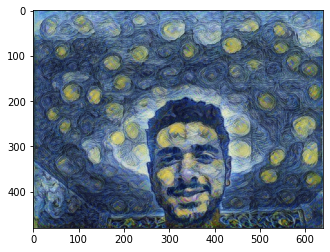

In [13]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  content_image = load_image(filename)
  # Show the image which was just taken.
  stylized_image = model((content_image), (style_image)) 
  plt.imshow(np.squeeze(stylized_image))
  plt.show()
  #display(Image(stylized_image))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [14]:
detections = detector.detectObjectsFromImage(input_image="photo.jpg", output_image_path="detected_image.jpg", minimum_percentage_probability=80)